# [WIP]

In [10]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt 

In [15]:
os.mkdir("Output")

## Using Time-Series Input

### Using Single Time-Series Input

In [11]:
ts_path = "./Test/rsHRF_toolbox_functionality_test/ts_input_single.txt"
ts = np.loadtxt(ts_path)
print(ts.shape)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


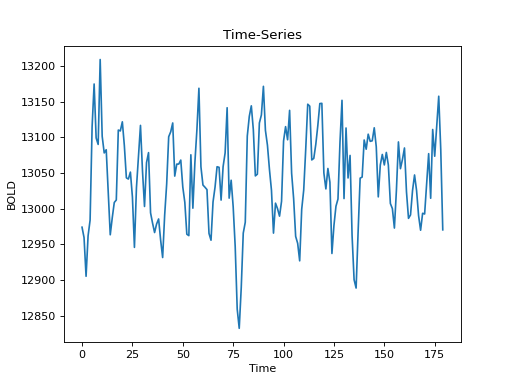

Text(0, 0.5, 'BOLD')

In [14]:
%pylab nbagg
plt.plot(ts)
plt.title("Time-Series")
plt.xlabel("Time")
plt.ylabel("BOLD")

In [17]:
os.system("rsHRF --ts " + ts_path + " -TR 2.1 --estimation gamma --output_dir ./Output/output_ts_single")

0

In [18]:
os.listdir("./Output/output_ts_single")

['ts_input_single_plot_1.png',
 'ts_input_single_plot_2.png',
 'ts_input_single_hrf_deconv.mat']

In [31]:
mat = scipy.io.loadmat("./Output/output_ts_single/ts_input_single_hrf_deconv.mat")
for each in mat.keys():
    print(each)

__header__
__version__
__globals__
para
hrfa
event_bold
PARA
event_number
data_deconv


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


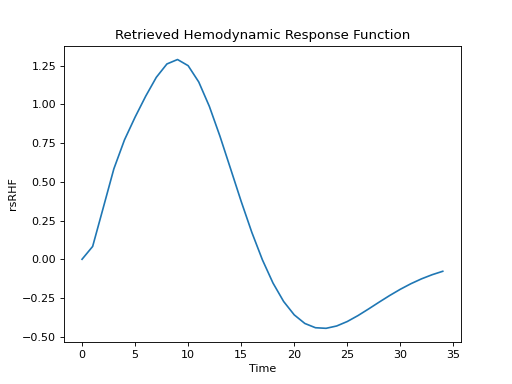

Text(0, 0.5, 'rsRHF')

In [32]:
hrfa = mat['hrfa']
%pylab nbagg
plt.plot(hrfa)
plt.title("Retrieved Hemodynamic Response Function")
plt.xlabel("Time")
plt.ylabel("rsRHF")

### Using Time-Series

In [35]:
ts_path = "./Test/rsHRF_toolbox_functionality_test/ts_input.txt"
ts = np.loadtxt(ts_path, delimiter=",")
print(ts.shape)

(180, 68)


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


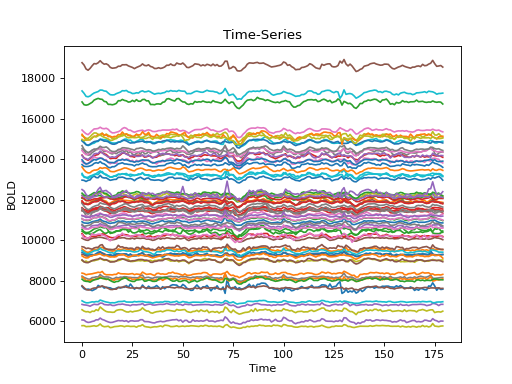

Text(0, 0.5, 'BOLD')

In [45]:
%pylab nbagg
ts_T = ts.T
for each in range(0,ts_T.shape[0]):
    plt.plot(ts_T[each])
plt.title("Time-Series")
plt.xlabel("Time")
plt.ylabel("BOLD")

In [52]:
os.system("rsHRF --ts " + ts_path + " -TR 2.1 --estimation hanning --output_dir ./Output/output_ts")

0

In [53]:
mat = scipy.io.loadmat("./Output/output_ts/ts_input_hrf_deconv.mat")
for each in mat.keys():
    print(each)

__header__
__version__
__globals__
para
hrfa
event_bold
PARA
event_number
data_deconv


In [54]:
hrfa = mat['hrfa']
hrfa_T = hrfa.T
print(hrfa.shape)

(35, 68)


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


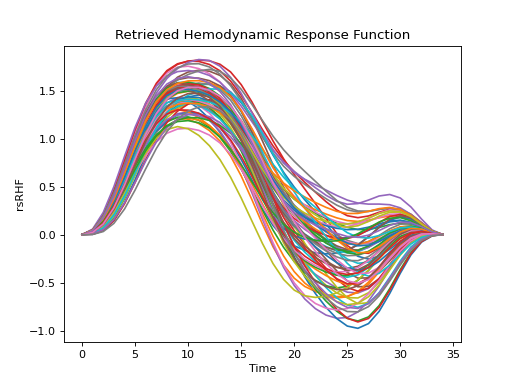

Text(0, 0.5, 'rsRHF')

In [55]:
%pylab nbagg
for each in hrfa_T:
    plt.plot(each)
plt.title("Retrieved Hemodynamic Response Function")
plt.xlabel("Time")
plt.ylabel("rsRHF")

## File Input

### NIfTI File Format

In [56]:
input_file = "./Test/rsHRF_toolbox_functionality_test/sub-031274_task-rest_bold.nii"
mask_file = "./Test/rsHRF_toolbox_functionality_test/sub-031274_task-rest_bold_brain.nii"

In [60]:
os.system("rsHRF --input_file " + input_file + " --atlas " + mask_file + " --estimation hanning --output_dir ./Output/output_input_w_mask_nifti")

0

In [61]:
os.system("rsHRF --input_file " + input_file + " --estimation hanning --output_dir ./Output/output_input_nifti")

0

In [63]:
input_file = "./Test/rsHRF_toolbox_functionality_test/sub-10171_task-rest_bold_space-fsaverage5.L.func.gii"

In [65]:
os.system("rsHRF --input_file " + input_file + " -TR 2.0 --estimation hanning --output_dir ./Output/output_input_gifti")

0

In [66]:
bids_dir = "./Test/rsHRF_toolbox_functionality_test/bids_dir"

In [67]:
os.system("rsHRF --bids_dir " + bids_dir + " --analysis_level participant --brainmask --estimation hanning --output_dir ./Output/output_input_bids_brainmask")

0